In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras 
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout 
import os

In [2]:
path1=r"D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train"

In [3]:
directory_contents = os.listdir(path1)
print(directory_contents)

['Mask', 'Non Mask']


In [4]:
cate=['Mask', 'Non Mask']

In [5]:
for i in cate:
    folders=os.path.join(path1,i)
    print(folders)

D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Non Mask


In [6]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        print(image_path)
        
## image we are able to access

D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0003.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0006.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0018.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0019.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0022.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0027.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0029.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0037.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0040.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0042.jpg
D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New 

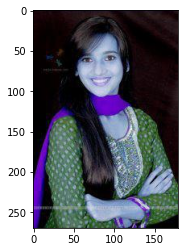

In [7]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)  # using the cv2 i am reading the image and storing in variable image_array
        plt.imshow(image_array)
        break

# Code for explanation that images have been accessed

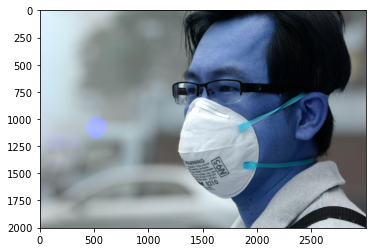

In [8]:
## TO access the 1st image 
abcd=cv2.imread(r"D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Train\Mask\0003.jpg")
abcd

abcd=np.array(abcd)
abcd

type(abcd)

plt.imshow(abcd)

In [9]:
### Till this point we have x but not y


In [10]:
image_size =200
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)  # we need to tell software which image is of cat which is of dog
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path) 
        image_array=cv2.resize(image_array,(image_size,image_size))# Resizing Each image to
        #print(image_path)
        input_image.append([image_array,label])

In [11]:
len(input_image)

600

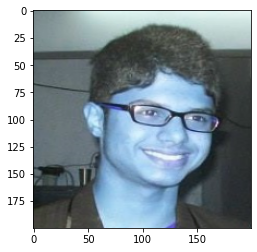

In [12]:
# This code with pick the random picture for X and Y values
np.random.shuffle(input_image)
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

plt.imshow(X[0])

In [13]:
X=np.array(X)
Y=np.array(Y)

X=X/255   # bcz the pixel max size we take 255

model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [14]:
model1=model.fit(X,Y,epochs=10)
model1

Epoch 1/10
19/19 [==============================] - 30s 1s/step - loss: 5.4967
Epoch 2/10
19/19 [==============================] - 28s 1s/step - loss: 0.2389
Epoch 3/10
19/19 [==============================] - 29s 2s/step - loss: 0.2026
Epoch 4/10
19/19 [==============================] - 28s 1s/step - loss: 0.1112
Epoch 5/10
19/19 [==============================] - 29s 2s/step - loss: 0.0673
Epoch 6/10
19/19 [==============================] - 30s 2s/step - loss: 0.0495
Epoch 7/10
19/19 [==============================] - 34s 2s/step - loss: 0.0272
Epoch 8/10
19/19 [==============================] - 33s 2s/step - loss: 0.0195
Epoch 9/10
19/19 [==============================] - 31s 2s/step - loss: 0.0158
Epoch 10/10
19/19 [==============================] - 28s 1s/step - loss: 0.0101


In [15]:
model1.history

{'loss': [5.49669885635376,
  0.23890109360218048,
  0.2025587558746338,
  0.11116141080856323,
  0.06727756559848785,
  0.04953284561634064,
  0.0271785706281662,
  0.0195345226675272,
  0.015772745013237,
  0.010111058130860329]}

In [16]:
Model1=pd.DataFrame(model1.history)
Model1

,loss
0,5.496699
1,0.238901
2,0.202559
3,0.111161
4,0.067278
5,0.049533
6,0.027179
7,0.019535
8,0.015773
9,0.010111


In [17]:
from sklearn.metrics import confusion_matrix,confusion_matrix,accuracy_score

In [18]:
pred_=model.predict(X)
class_1=np.argmax(pred_,axis=1)

pred_

array([[1.7889607e-03, 9.9821103e-01],
       [9.9930465e-01, 6.9535145e-04],
       [8.6152833e-03, 9.9138474e-01],
       ...,
       [3.4469274e-09, 1.0000000e+00],
       [8.9453868e-05, 9.9991059e-01],
       [9.3706280e-01, 6.2937148e-02]], dtype=float32)

In [19]:
tab1=confusion_matrix(class_1, Y)

tab1

array([[300,   0],
       [  0, 300]], dtype=int64)

In [20]:
tab1.diagonal().sum()/tab1.sum()  # Accuracy  

1.0

### Save the Model

In [21]:
pwd

'C:\\Users\\sasai\\jupyter notebook\\Python\\Time series and deep learning'

In [22]:
model.save("my_mask_&_no_mask_mode.h5") # model is saved at the path shown in pwd with the name in ""

### load the model

In [55]:
from keras.models import load_model
model =load_model("my_mask_&_no_mask_mode.h5") 

In [24]:
# and now use it for prediction
#model.predict()

### Load the Test file

In [34]:
path2=r"D:\Imarticus\Time Series And Deep Learning\CNN\dataset4\New Masks Dataset\Test"

In [35]:
directory_contents = os.listdir(path1)
print(directory_contents)

['Mask', 'Non Mask']


In [36]:
cate1=['Mask', 'Non Mask']

In [37]:
image_size =200
input_image=[]
for i in cate1:
    folders=os.path.join(path2,i)
    label=cate1.index(i)  # we need to tell software which image is of cat which is of dog
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path) 
        image_array=cv2.resize(image_array,(image_size,image_size))# Resizing Each image to
        #print(image_path)
        input_image.append([image_array,label])

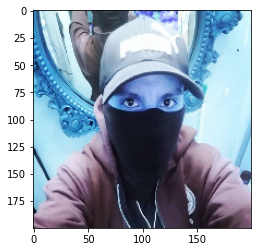

In [38]:
# This code with pick the random picture for X and Y values
np.random.shuffle(input_image)
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

plt.imshow(X[0])

In [39]:
X=np.array(X)
Y=np.array(Y)

X=X/255   # bcz the pixel max size we take 255

model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [40]:
pred_=model.predict(X)
class_1=np.argmax(pred_,axis=1)

pred_

array([[0.4949289 , 0.50507104],
       [0.5010862 , 0.49891382],
       [0.47866008, 0.5213399 ],
       [0.47907093, 0.52092904],
       [0.50332546, 0.49667457],
       [0.43355414, 0.5664459 ],
       [0.44628635, 0.55371356],
       [0.4456409 , 0.55435914],
       [0.46842626, 0.53157365],
       [0.42551783, 0.57448214],
       [0.4398139 , 0.5601861 ],
       [0.4795887 , 0.52041125],
       [0.47909948, 0.52090055],
       [0.4991675 , 0.5008325 ],
       [0.46176833, 0.5382317 ],
       [0.47201076, 0.5279892 ],
       [0.47226852, 0.5277315 ],
       [0.4871146 , 0.51288533],
       [0.45025465, 0.5497453 ],
       [0.47260445, 0.5273955 ],
       [0.49665526, 0.5033448 ],
       [0.5134703 , 0.48652977],
       [0.493013  , 0.5069869 ],
       [0.45002764, 0.54997236],
       [0.4526229 , 0.5473771 ],
       [0.46506414, 0.5349359 ],
       [0.45593768, 0.54406226],
       [0.44222194, 0.5577781 ],
       [0.43976122, 0.5602387 ],
       [0.46952194, 0.53047806],
       [0.

In [41]:
tab1=confusion_matrix(class_1, Y)

tab1

array([[ 5,  6],
       [45, 44]], dtype=int64)

In [42]:
tab1.diagonal().sum()/tab1.sum()  # Accuracy  

0.49

In [65]:
import cv2
import numpy as np
from keras.models import load_model
model = load_model(r"D:\Imarticus\Time Series And Deep Learning\my_mask_NoMask_model.h5") 

In [63]:
pwd

'C:\\Users\\sasai\\jupyter notebook\\Python\\Time series and deep learning'

In [67]:
#model=load_model('my_mask_NoMask_model.h5')

In [66]:
results={0:'Mask  found',1:'Mask not found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier(r"D:\Imarticus\Time Series And Deep Learning\OpenCV\Data Shared by sir\Harcascade\haarcascade_frontalface_default.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()

In [68]:
#  link import cv2
import numpy as np
from keras.models import load_model
model = load_model(r"D:\Imarticus\Time Series And Deep Learning\CNN\my_mask_NoMask_model.h5")  
#model=load_model("my_mask_NoMask_model.h5")

results={0:'Mask  found',1:'Mask not found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier(r"D:\Imarticus\Time Series And Deep Learning\OpenCV\Data Shared by sir\Harcascade\haarcascade_frontalface_alt.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()